In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading data
data = pd.read_csv('new_data')
print(data.shape)
data.head()

(2240, 9)


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,MntSweetProducts,NumWebPurchases,Response
0,0,5524,1957,Graduation,Single,58138.0,88,8,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,0
2,2,4141,1965,Graduation,Together,71613.0,21,8,0
3,3,6182,1984,Graduation,Together,26646.0,3,2,0
4,4,5324,1981,PhD,Married,58293.0,27,5,0


In [3]:
# dropping the extra column created at begining named 'Unnamed: 0'
data.drop('Unnamed: 0',axis=1,inplace=True)
print(data.shape)
data.head()

(2240, 8)


,ID,Year_Birth,Education,Marital_Status,Income,MntSweetProducts,NumWebPurchases,Response
0,5524,1957,Graduation,Single,58138.0,88,8,1
1,2174,1954,Graduation,Single,46344.0,1,1,0
2,4141,1965,Graduation,Together,71613.0,21,8,0
3,6182,1984,Graduation,Together,26646.0,3,2,0
4,5324,1981,PhD,Married,58293.0,27,5,0


In [4]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2240 non-null   int64  
 1   Year_Birth        2240 non-null   int64  
 2   Education         2240 non-null   object 
 3   Marital_Status    2240 non-null   object 
 4   Income            2216 non-null   float64
 5   MntSweetProducts  2240 non-null   int64  
 6   NumWebPurchases   2240 non-null   int64  
 7   Response          2240 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 140.1+ KB


In [5]:
# checking for Missing Values
data.columns[data.isna().any()].to_list()

['Income']

In [6]:
data['Income'].isna().sum()

24

Variable **'Income'** has **24 missing** values.

In [7]:
# creating new feature 'Age' and dropping 'ID', 'Year_Birth'
data['Age'] = [2021-i for i in data['Year_Birth']]
data.drop(['ID','Year_Birth'],axis=1,inplace=True)
data.head()

,Education,Marital_Status,Income,MntSweetProducts,NumWebPurchases,Response,Age
0,Graduation,Single,58138.0,88,8,1,64
1,Graduation,Single,46344.0,1,1,0,67
2,Graduation,Together,71613.0,21,8,0,56
3,Graduation,Together,26646.0,3,2,0,37
4,PhD,Married,58293.0,27,5,0,40


In [8]:
# information of data now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education         2240 non-null   object 
 1   Marital_Status    2240 non-null   object 
 2   Income            2216 non-null   float64
 3   MntSweetProducts  2240 non-null   int64  
 4   NumWebPurchases   2240 non-null   int64  
 5   Response          2240 non-null   int64  
 6   Age               2240 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 122.6+ KB


In [9]:
# to get more information about data
data.describe(include='all')

,Education,Marital_Status,Income,MntSweetProducts,NumWebPurchases,Response,Age
count,2240,2240,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,5,8,NaN,NaN,NaN,NaN,NaN
top,Graduation,Married,NaN,NaN,NaN,NaN,NaN
freq,1127,864,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,52247.251354,27.062946,4.084821,0.149107,52.194196
std,NaN,NaN,25173.076661,41.280498,2.778714,0.356274,11.984069
min,NaN,NaN,1730.000000,0.000000,0.000000,0.000000,25.000000
25%,NaN,NaN,35303.000000,1.000000,2.000000,0.000000,44.000000
50%,NaN,NaN,51381.500000,8.000000,4.000000,0.000000,51.000000
75%,NaN,NaN,68522.000000,33.000000,6.000000,0.000000,62.000000


In [10]:
# to see the portion of dataset with Missing values in 'Income' feature
d1 = data[data['Income'].isna()]
d1

,Education,Marital_Status,Income,MntSweetProducts,NumWebPurchases,Response,Age
10,Graduation,Married,NaN,2,1,0,38
27,Graduation,Single,NaN,263,27,0,35
43,PhD,Single,NaN,2,1,0,62
48,Graduation,Single,NaN,10,2,0,70
58,Graduation,Single,NaN,2,2,0,39
71,2n Cycle,Married,NaN,4,3,0,48
90,PhD,Married,NaN,37,7,0,64
91,Graduation,Single,NaN,0,1,0,64
92,Master,Together,NaN,28,2,0,48
128,PhD,Married,NaN,0,6,0,60


Now, we will treat missing values in Income. For that we will plot histogram and boxplot to show how Income is distributed in non-null portion.

(array([1.654e+03, 5.540e+02, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1730. ,  68223.6, 134717.2, 201210.8, 267704.4, 334198. ,
        400691.6, 467185.2, 533678.8, 600172.4, 666666. ]),
 <BarContainer object of 10 artists>)

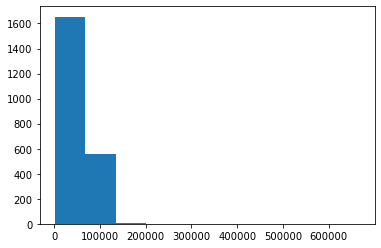

In [11]:
# histogram of 'Income' feature from non-null portion
plt.hist(data['Income'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

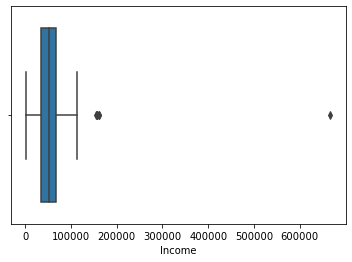

In [12]:
# boxplot of 'Income' feature from non-null portion
sns.boxplot(data['Income'])

From above two diagrams it can be concluded that Income has outlier in its non-null portion. Now, we will see same histogram and boxplot without outliers.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

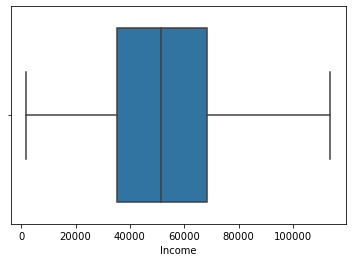

In [13]:
sns.boxplot(data[data['Income']<150000]['Income'])

(array([ 37., 185., 333., 399., 351., 367., 331., 174.,  28.,   3.]),
 array([  1730. ,  12930.4,  24130.8,  35331.2,  46531.6,  57732. ,
         68932.4,  80132.8,  91333.2, 102533.6, 113734. ]),
 <BarContainer object of 10 artists>)

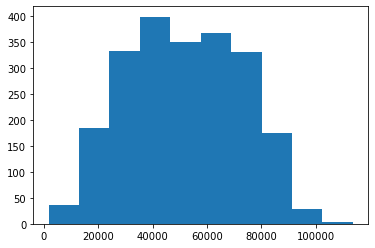

In [14]:
plt.hist(data[data['Income']<150000]['Income'])

From the above diagram distribution of Income seems quite normal without extreme value (in the below 150000 portion) (obviously oin non-null portion). We can think of it as hypothesis. Thus our first hypothesis would be:

**Hypothesis-1:**\
$H_0$ : Income distribution is normal for income below 150000.\
$H_1$ : Income distribution is not normal for income below 150000.<p>
Let us perform Shapiro-wilk test to check it statistically. We will reject null hypothesis at $\alpha$ level of significance if test-statistic value will be greater than p-value at level of significance $\alpha$.

In [15]:
from scipy.stats import normaltest
stat, p = normaltest(data[data['Income']<150000]['Income'])
print('stat = %.3f, p=%f' % (stat,p))
if p>0.05:
    print('From test, can coclude on 5% level of significance, Income is normally distributed.')
else:
    print('From test, can coclude on 5% level of significance, Income is not normally distributed.')

stat = 231.546, p=0.000000
From test, can coclude on 5% level of significance, Income is not normally distributed.


From test, we can conclude that Income is not normal.

Now, let us go for imputing missing values in Income variable. We will imput by taking into consideration Age, Educational Status and Marrital Status.

In [16]:
# checking for minimum and maximum age among customers
print('Minimum age : ',data['Age'].min())
print('Maximum age : ',data['Age'].max())

Minimum age :  25
Maximum age :  128


In [17]:
# labeling them (bining them) from domain knowledge
data['Age_labels'] = [1 if 25<=i<35 else 2 if 35<=i<50 else 3 if 50<=i<60 else 4 if 60<=i<80 else 5 for i in data['Age']]

In [18]:
# As seen before, Income has some outliers (extreme values), we will impute by median of each group 
data1 = data.dropna()
data1.groupby(['Marital_Status','Education','Age_labels']).median()['Income']

Marital_Status  Education   Age_labels
Absurd          Graduation  1             79244.0
                Master      4             65487.0
Alone           Graduation  1             34176.0
                Master      4             61331.0
                PhD         2             35860.0
                                           ...   
Widow           Master      3             59379.5
                            4             51529.0
                PhD         3             54111.0
                            4             57513.0
YOLO            PhD         2             48432.0
Name: Income, Length: 96, dtype: float64

In [19]:
# imputing missing values of Income variable
data["Income"] = data.groupby(['Marital_Status','Education','Age_labels']).transform(lambda x: x.fillna(x.median()))
data

,Education,Marital_Status,Income,MntSweetProducts,NumWebPurchases,Response,Age,Age_labels
0,Graduation,Single,58138.0,88,8,1,64,4
1,Graduation,Single,46344.0,1,1,0,67,4
2,Graduation,Together,71613.0,21,8,0,56,3
3,Graduation,Together,26646.0,3,2,0,37,2
4,PhD,Married,58293.0,27,5,0,40,2
...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,118,9,0,54,3
2236,PhD,Together,64014.0,0,8,0,75,4
2237,Graduation,Divorced,56981.0,12,2,0,40,2
2238,Master,Together,69245.0,30,6,0,65,4


(array([189., 506., 685., 541., 300.,  16.,   0.,   0.,   0.,   3.]),
 array([ 25. ,  35.3,  45.6,  55.9,  66.2,  76.5,  86.8,  97.1, 107.4,
        117.7, 128. ]),
 <BarContainer object of 10 artists>)

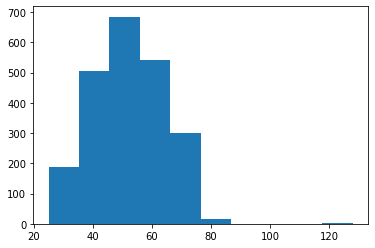

In [20]:
plt.hist(data['Age'])

(array([ 43., 178., 203., 423., 388., 306., 276., 241., 155.,  24.]),
 array([25. , 30.6, 36.2, 41.8, 47.4, 53. , 58.6, 64.2, 69.8, 75.4, 81. ]),
 <BarContainer object of 10 artists>)

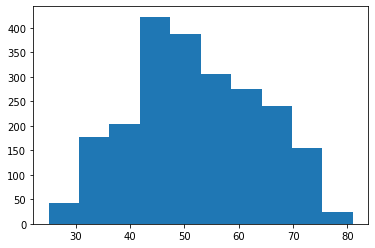

In [21]:
plt.hist(data[data['Age']<100]['Age'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='Age'>

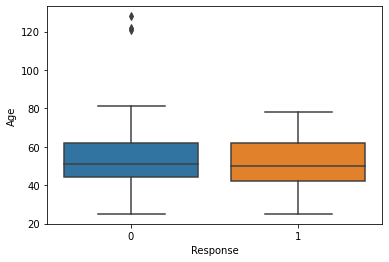

In [22]:
sns.boxplot(data['Response'],data['Age'])

It seems from the diagram that median age of both responses are neraly same. We can think of hypothesis that:

**Hypothesis-2:**\
$H_0$ : Median age is same for both responses.\
$H_1$ : Median age is different for both responses.

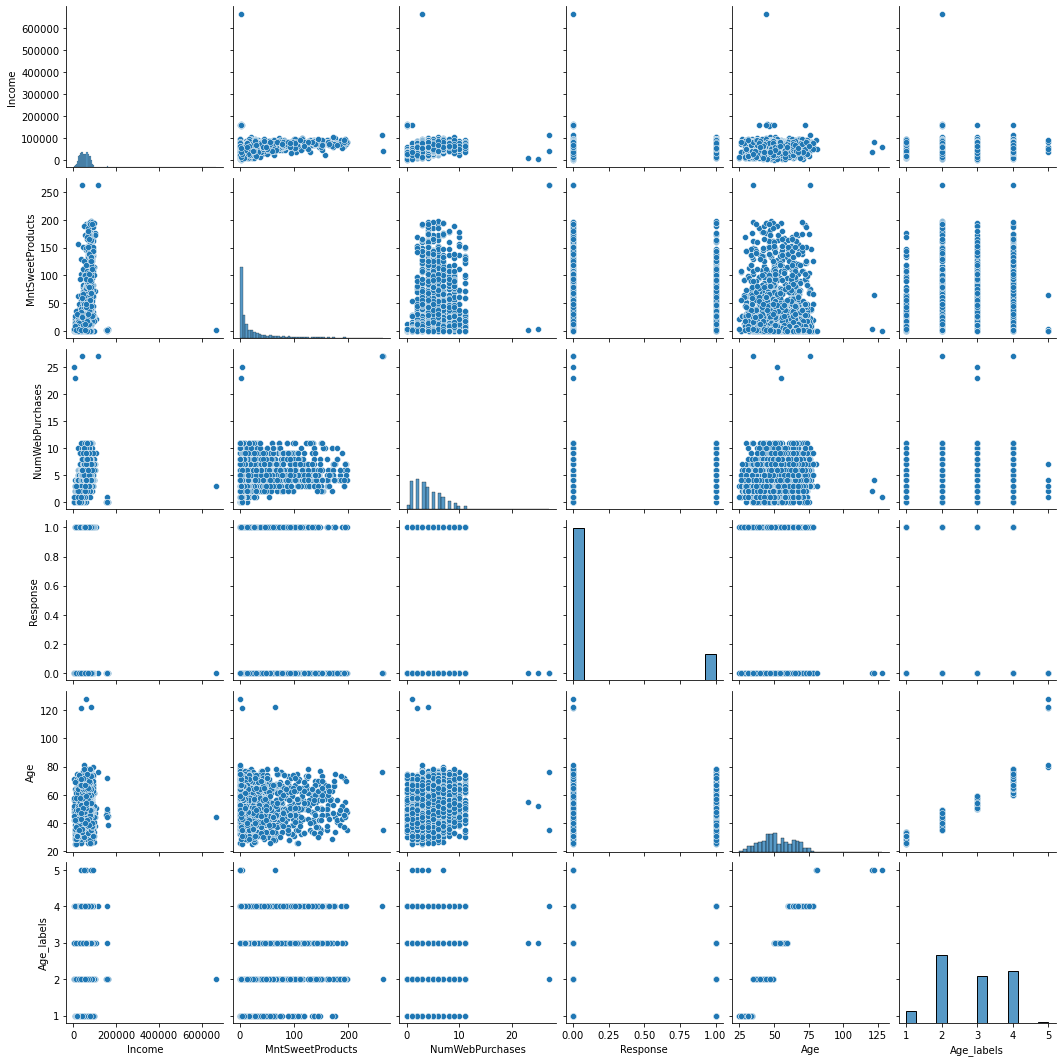

In [23]:
# let's see correlation between variables (here 'Education' and 'Marital_Status' not included)
sns.pairplot(data)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumWebPurchases', ylabel='Age'>

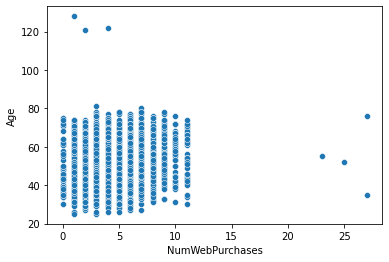

In [24]:
sns.scatterplot(data['NumWebPurchases'],data['Age'])

From the diagram it seems that there is no correlation between Number of Web Purchases and age. We can think of hypothesis.


**Hypothesis-3:**\
$H_0$ : Age and Number of Web Purchases (NumWebPurchases) have no correlation.\
$H_1$ : Age and Number of Web Purchases (NumWebPurchases) are correlated.